In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

A study was conducted on 200 patients admitted to a hospital ICU to create logistic regression model that would predict a patient's survival to hospital dischage. There are 21 variables in the model.

 |Variable| Description| Codes/Values| Name|
|----|----|----|----|
|1|Identfication Code|ID Number|ID|
|2| Vital status at hospital discharge| 0 = Lived, 1 = Died |STA
|3| Age| Years| AGE|
|4| Gender | 0 = Male, 1 = Female |GENDER|
|5 |Race| 1 = White, 2 = Black,3 = Other|RACE|
|6| Service at ICU admission |0 = Medical, 1 = Surgical|SER|
|7| Cancer part of present problem| 0 = No, 1 = Yes|CAN|
|8| History of chronic renal failure | 0 = No, 1 = Yes|CRN|
|9| Infection probable at ICU admission|0 = No, 1 = Yes|INF|
|10| CPR prior to ICU admission| 0 = No, 1 = Yes|CPR|
|11|Systolic blood pressure at ICU admission|mm Hg |SYS|
|12| Heart rate at ICU admission| Beats/min| HRA|
|13| Previous admission to an ICU within 6 months |0 = No, 1 = Yes|PRE|
|14| Type of admission |0 = Elective, 1 = Emergency| TYPE|
|15| Long bone, multiple, neck, single area, or hip fracture| 0 = No, 1 = Yes |FRA|
|16| $PO_2$ from initial blood gases| 0 = > 60, 1 = ≤ 60 |PO2|
|17| PH from initial blood gases| 0 = ≥ 7.25, 1 = <7.25| PH |
|18| PCO2 from initial blood gases| 0 = ≤ 45, 1 = > 45|PCO|
|19| Bicarbonate from initial blood gases|0 = ≥ 18, 1 = <18|BIC|
|20| Creatinine from initial blood gases| 0 = ≤ 2.0, 1 = > 2.0|CRE|
|21| Level of consciousness at ICU admission |0 = No coma or deep stupor, 1 = Deep stupor, 2 = Coma|LOC|

In [2]:
read = r"C:\Users\coryb\OneDrive\Categroical Analysis\ICU.txt"
df= pd.read_csv(read,delimiter = "\t")
df.head()

,ID,STA,AGE,GENDER,RACE,SER,CAN,CRN,INF,CPR,...,HRA,PRE,TYP,FRA,PO2,PH,PCO,BIC,CRE,LOC
0,4,1,87,1,1,1,0,0,1,0,...,96,0,1,1,1,1,1,0,0,0
1,8,0,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,0
2,12,0,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,0
3,14,0,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0
4,27,1,76,1,1,1,0,0,1,0,...,90,1,1,0,0,0,0,0,0,0


In the ICU data described in Section 1.6.1 the primary outcome variable is vital status at hospital discharge, STA. Clinicians associated with the study felt that a key determinant of survival was the patient’s age at admission, AGE.

#### 1. Write down the equation for the logistic regression model of STA on AGE. 

In [3]:
y=df['STA']
X = df['AGE']
X1=sm.add_constant(X)
model = sm.Logit(y,X1).fit()

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6


In [4]:
model.params

const   -3.058513
AGE      0.027543
dtype: float64

$$\pi(x)= \frac{e^{-3.058513+0.027543X_i}}{1+e^{-3.058513+0.027543X_i}}$$

#### Write down the equation for the logit transformation of this logistic regression model.

$$ln\left[\frac{\pi(x)}{1-\pi{x}}\right] = -3.058513 + 0.027543x$$

#### What characteristic of the outcome variable, STA, leads us to consider the logistic regression model as opposed to the usual linear regression model to describe the relationship between STA and AGE? ##

Linear regression is a continuous projection of the average response given independent variables. The continuousness of linear regression is unsuitable for dichotomous variables because the estimated average from linear regression will extend in both the negative and positive infinity directions. Logistic regression is used because we can contain the response variable within the confines of 0 and 1 and therefore create a probabilit that an event will either be a 1 or a 0.

<AxesSubplot:xlabel='STA', ylabel='count'>

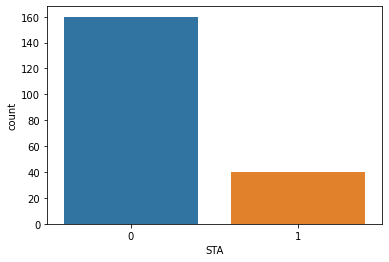

In [5]:
sns.countplot(data=df, x='STA')

####  Form a scatterplot of STA versus AGE.

<AxesSubplot:xlabel='AGE', ylabel='STA'>

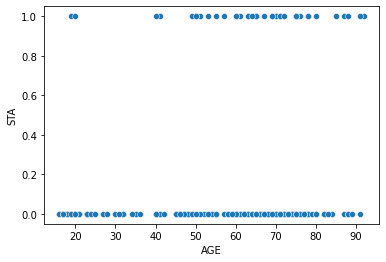

In [6]:
sns.scatterplot(data=df, x='AGE', y='STA')

#### Using the intervals (15, 24), (25, 34), (35, 44), (45, 54), (55, 64), (65, 74), (75, 84), (85, 94) for age, compute the STA mean over subjects within each age interval. Plot these values of mean STA versus the midpoint of the age interval.

In [7]:
bin_ages = pd.cut(x=df.AGE, right=False,bins= [15,25,35,45,55,65,75,85,94])
bin_ages = pd.DataFrame(bin_ages)
bin_ages.rename(columns={'AGE':'BinAge'},inplace=True)
df=df.join(bin_ages);

In [8]:
grouped = df.groupby('BinAge').mean('STA')

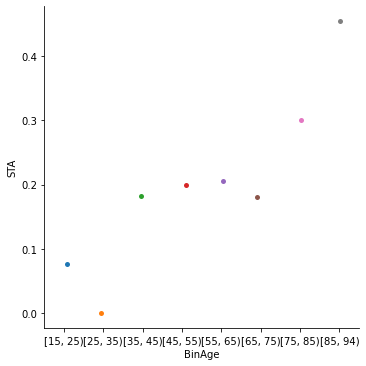

In [9]:
sns.catplot(data=grouped.reset_index(), x='BinAge', y = 'STA')

#### Write down an expression for the likelihood and log likelihood for the logistic regression model in Exercise 1(a) using the ungrouped, n = 200, data. Obtain expressions for the two likelihood equations.

Whereas linear regression uses least squares to estimate a model's coefficients, logistic regression uses maximum likelihood. The maximum likelihood estimators of the parameters are the values that maximizes the Bernoulli distribution:

$$p(x) = \begin{cases} 
    \pi(x_i)^{y_i}\left[1-\pi(x_i) \right]^{1-y_i}\quad &\text{if} \, x=1\\ 
    0                                             \quad &\text{if otherwise}\\ \end{cases} $$

We treat each outcome as independent, therefore the likelihood function is obtained as the product of the terms in the equation.

$$l(\beta) = \prod_{i=1}^{n} \pi(x_i)^y_{i}\left[1-\pi(x_i)\right]^{1-y_i} $$

Solving the equation is much easier when we take the log of the expression above to obtain:

$$ l(\beta) = \ln\left[l\left(\beta\right)\right] = \sum_{i=1}^{n} \left\{y_i \ln\left[\pi(x_i)\right] + (1-y_i) \ln\left[1-\pi(x_i) \right] \right\} $$

Differentiate the equation with respect to $\beta_0$ and $\beta_1$ while setting the equations to zero will maximize the parameters.The differentiated equations are:

$$\sum\left[ y_i - \pi (x_i) \right] = 0 $$

$$\sum x_i\left[ y_i - \pi (x_i) \right] = 0 $$

#### Using the model's estimates plot the equation for the fitted values in a scatterplots ####

<AxesSubplot:xlabel='AGE', ylabel='STA'>

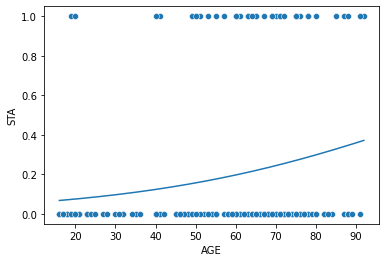

In [10]:
inputs = np.linspace(df['AGE'].min(),df['AGE'].max(),1000)
probs = model.predict(sm.add_constant(inputs))

sns.lineplot(x=inputs, y = probs)
sns.scatterplot(data=df, x='AGE',y='STA')

#### Using the results of the output from the logistic regression package assess the significance of the slope coefficient for AGE using the likelihood ratio test, the Wald test, and if possible, the score test.

46

In linear regression, we interpret the coefficients as the rate of change in the response for every unit of increase in the explanatory variable. Logistic regression has a slightly different interpretation because the logistic function does not have a constant slope. In addition to the differences in shape, the logistic regression model also estimates log odds rather than a constant. Log odds keep the response variable contained between 0 and 1, which is necessary for predicting binary response variables.  

As a result of this configuration, we can use two different forms of the logistic function. One form is the logit function, or log odds function. The coefficients of the logit regression model represent the rate of change in the log odds given increases in the explanatory variables.

$$\ln\left(\frac{p}{1-p}\right)=\beta_0+\beta_1 X_i$$
